Model Performance:
ROC AUC Score: 0.9875282497295895

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      7089
           1       0.94      0.95      0.95      7338

    accuracy                           0.95     14427
   macro avg       0.95      0.95      0.95     14427
weighted avg       0.95      0.95      0.95     14427



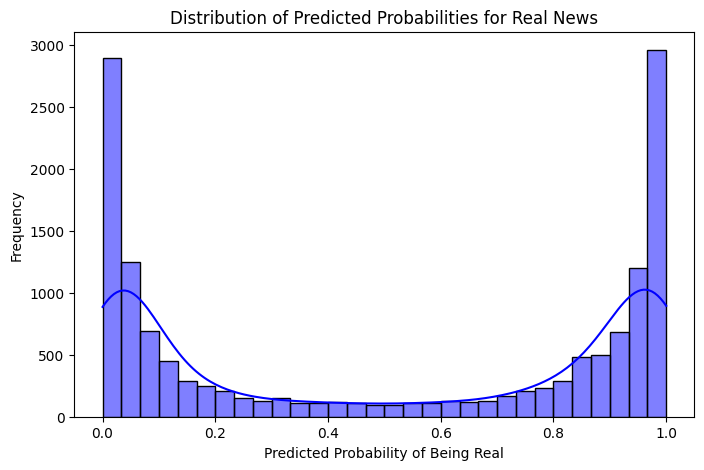


Example Prediction:
Probability of being REAL: 0.97, FAKE: 0.03


In [4]:
# Importing required libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
df = pd.read_csv("WELFake_Dataset.csv")

# Combine 'title' and 'text' columns into a single column for analysis
df['content'] = df['title'] + " " + df['text']

# Step 2: Handle missing values
# Fill missing content with empty string
df['content'] = df['content'].fillna("")

# Step 3: Define features (X) and target (y)
X = df['content']  # News content
y = df['label']    # 0 = fake, 1 = real

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Convert text data into numerical features using TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 6: Train a Logistic Regression model
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_tfidf, y_train)

# Step 7: Predict the probability of being real for each test article
y_pred_prob = logreg.predict_proba(X_test_tfidf)[:, 1]  # Probability of being real (class 1)

# Step 8: Evaluate the model
print("Model Performance:")
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:")
print(classification_report(y_test, logreg.predict(X_test_tfidf)))

# Step 9: Save the trained model and vectorizer for future use
joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Step 10: Visualize the distribution of predicted probabilities for the test set
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_prob, kde=True, color="blue", bins=30)
plt.title("Distribution of Predicted Probabilities for Real News")
plt.xlabel("Predicted Probability of Being Real")
plt.ylabel("Frequency")
plt.show()

# Example: Predict the probability for a new article
def predict_news_probability(article):
    # Preprocess the article and predict its probability of being real
    processed_article = tfidf.transform([article])
    prob_real = logreg.predict_proba(processed_article)[0][1]
    prob_fake = 1 - prob_real  # Complement probability (fake)
    return f"Probability of being REAL: {prob_real:.2f}, FAKE: {prob_fake:.2f}"

# Test with an example article
example_article = "Breaking news: A new species of bird discovered in the Amazon rainforest."
print("\nExample Prediction:")
print(predict_news_probability(example_article))


In [5]:
# Load the saved Logistic Regression model
logreg = joblib.load('logistic_regression_model.pkl')

# Load the saved TF-IDF vectorizer
tfidf = joblib.load('tfidf_vectorizer.pkl')

# Example: Predict the probability for a new article
example_article = "Breaking news: A new species of bird discovered in the Amazon rainforest."
print(predict_news_probability(example_article))


Probability of being REAL: 0.97, FAKE: 0.03


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Armaan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
None

Dataset Head:
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their vo

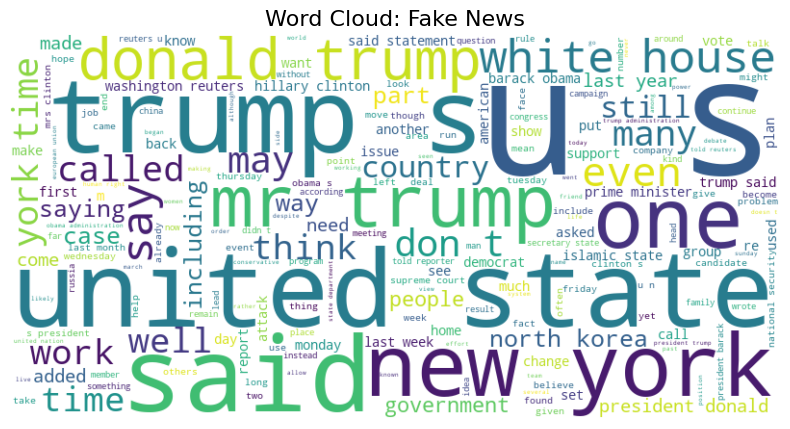

Generating Word Cloud for Real News...


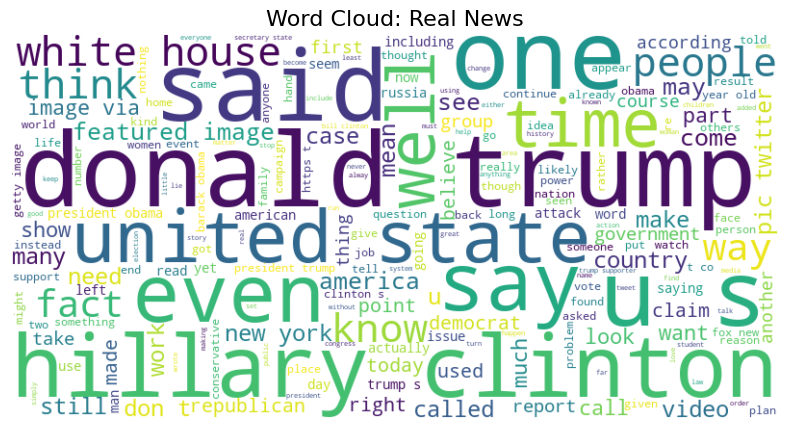

In [2]:
# Importing required libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import string
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (if not already installed)
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv("WELFake_Dataset.csv")

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nDataset Head:")
print(df.head())

# Check for null values
print("\nNull Values in Dataset:")
print(df.isnull().sum())

# Combine 'title' and 'text' columns into a single column for analysis
df['content'] = df['title'] + " " + df['text']

# Separate data based on labels
fake_news = df[df['label'] == 0]['content'].astype(str)
real_news = df[df['label'] == 1]['content'].astype(str)

# Function to preprocess text (remove stopwords and punctuation)
def preprocess_text(text_series):
    stop_words = set(stopwords.words('english'))
    all_text = " ".join(text_series).lower()
    words = all_text.split()
    filtered_words = [
        word.strip(string.punctuation) for word in words if word not in stop_words
    ]
    return " ".join(filtered_words)

# Preprocess fake and real news text
processed_fake_news = preprocess_text(fake_news)
processed_real_news = preprocess_text(real_news)

# Function to generate a word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=200,
    ).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Generate word clouds for fake and real news
print("Generating Word Cloud for Fake News...")
generate_word_cloud(processed_fake_news, "Word Cloud: Fake News")

print("Generating Word Cloud for Real News...")
generate_word_cloud(processed_real_news, "Word Cloud: Real News")


   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


C:\Users\Armaan\AppData\Local\Temp\ipykernel_15600\1728936990.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=news_counts.index, y=news_counts.values, palette='viridis')


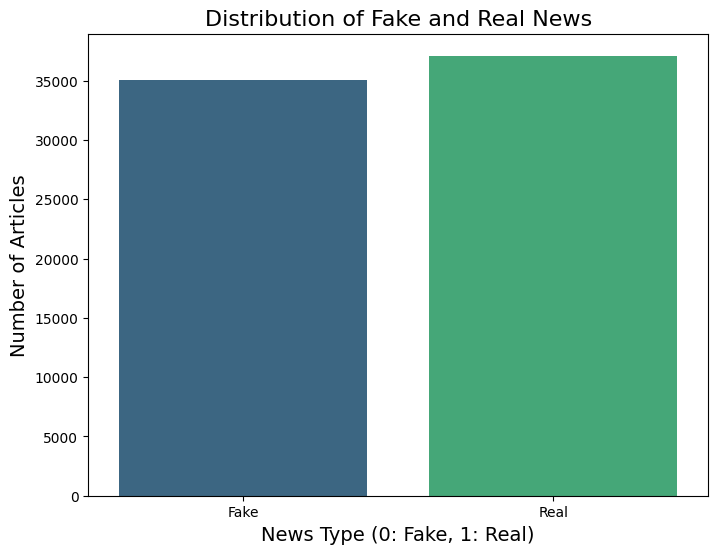

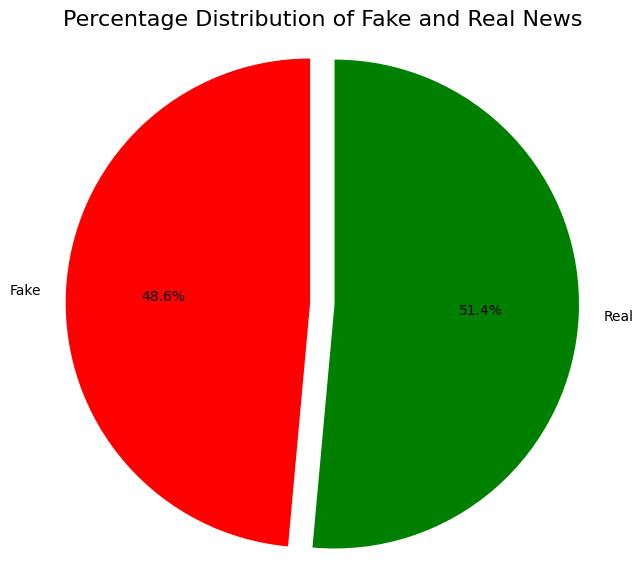

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("WELFake_Dataset.csv")

# Display the first few rows to understand the structure
print(df.head())

# Count the number of fake and real news
news_counts = df['label'].value_counts().sort_index()  # Ensure correct sorting by index (0: Fake, 1: Real)

# Bar Chart - Distribution of Fake and Real News
plt.figure(figsize=(8, 6))
sns.barplot(x=news_counts.index, y=news_counts.values, palette='viridis')
plt.title("Distribution of Fake and Real News", fontsize=16)
plt.xlabel("News Type (0: Fake, 1: Real)", fontsize=14)
plt.ylabel("Number of Articles", fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'], rotation=0)
plt.show()

# Pie Chart - Distribution of Fake and Real News
plt.figure(figsize=(7, 7))
plt.pie(news_counts, labels=['Fake', 'Real'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'], explode=(0.1, 0))
plt.title("Percentage Distribution of Fake and Real News", fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
